## 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
from google.colab import files
myfile = files.upload()

Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [ ]:
train = pd.read_csv(io.BytesIO(myfile['train.csv']))
test = pd.read_csv(io.BytesIO(myfile['test.csv']))

In [ ]:
train.drop(['Unnamed: 0'],inplace=True,axis=1)
test.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(731, 11)
(30, 11)


In [ ]:
train

,대여건수,월,일,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,대여날짜
0,79878,6,1,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,2019-06-01
1,77091,6,2,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,2019-06-02
2,82911,6,3,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,2019-06-03
3,83576,6,4,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,2019-06-04
4,81515,6,5,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,2019-06-05
...,...,...,...,...,...,...,...,...,...,...,...
726,74271,5,27,22.684211,14.125000,3,73.716216,26.351351,2.691892,0,2021-05-27
727,78928,5,28,24.631579,14.875000,3,69.121622,21.418919,1.903378,0,2021-05-28
728,63064,5,29,25.684211,15.875000,3,73.412162,28.310811,1.735135,0,2021-05-29
729,92536,5,30,26.052632,17.750000,3,72.837838,28.040541,1.737162,0,2021-05-30


## 계절변수

In [ ]:
def season(data):

    if data['월'] in [12,1,2] :
        return "winter"
    elif data['월'] in [3,4,5] :
        return "spring"
    elif data['월'] in [6,7,8] :
        return "summer"
    elif data['월'] in [9,10,11] : 
        return "fall"


In [ ]:
train['계절'] = train.apply(season,axis=1)

In [ ]:
test['계절'] = test.apply(season,axis=1)

## 주말 변수

In [ ]:
train.대여날짜 = pd.to_datetime(train.대여날짜)
test.대여날짜 = pd.to_datetime(test.대여날짜)

In [ ]:
import datetime 

In [ ]:
def week_name(data):
    days = ['MON','TUE','WED','THUR','FRI','SAT','SUN']
    return days[data['대여날짜'].weekday()]

In [ ]:
train['요일'] = train.apply(week_name,axis=1)
test['요일'] = test.apply(week_name,axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(731, 13)
(30, 13)


## 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text

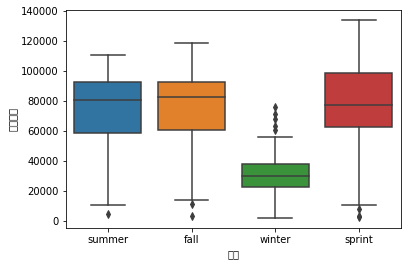

In [ ]:
sns.boxplot(x="계절", y="대여건수",data=train)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text

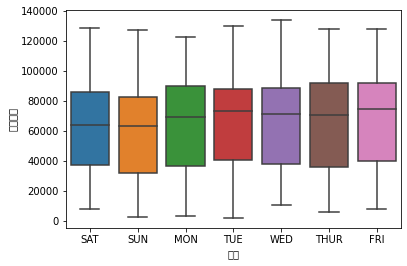

In [ ]:
sns.boxplot(x="요일", y="대여건수",data=train)

winter만 선택하기로 한다.

## Final data

In [ ]:
def winter(data):
    if data.계절 == "winter" :
        return 1
    else : 
        return 0

In [ ]:
train['winter'] = train.apply(winter,axis=1)
test['winter'] = test.apply(winter,axis=1)

In [ ]:
train.to_csv("train_season.csv")

In [ ]:
test.to_csv("test_season.csv")